In [29]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

In [31]:
def eval_numerical_gradient_array(f, x, df, h=1e-5):
  """
  Evaluate a numeric gradient for a function that accepts a numpy
  array and returns a numpy array.
  """
  grad = np.zeros_like(x)
  it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
  while not it.finished:
    ix = it.multi_index
    
    oldval = x[ix]
    x[ix] = oldval + h
    pos = f(x)
    x[ix] = oldval - h
    neg = f(x)
    x[ix] = oldval
    
    grad[ix] = np.sum((pos - neg) * df) / (2 * h)
    it.iternext()
   
  return grad

In [32]:
def eval_numerical_gradient(f, x, verbose=False, h=0.00001):
  """ 
  a naive implementation of numerical gradient of f at x 
  - f should be a function that takes a single argument
  - x is the point (numpy array) to evaluate the gradient at
  """ 

  fx = f(x) # evaluate function value at original point
  grad = np.zeros_like(x)
  # iterate over all indexes in x
  it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
  while not it.finished:

    # evaluate function at x+h
    ix = it.multi_index
    oldval = x[ix]
    x[ix] = oldval + h # increment by h
    fxph = f(x) # evalute f(x + h)
    x[ix] = oldval - h
    fxmh = f(x) # evaluate f(x - h)
    x[ix] = oldval # restore

    # compute the partial derivative with centered formula
    grad[ix] = (fxph - fxmh) / (2 * h) # the slope
    if verbose:
      print ix, grad[ix]
    it.iternext() # step to next dimension

  return grad

In [33]:
def affine_forward(x, w, b):
  """
  Computes the forward pass for an affine (fully-connected) layer.

  The input x has shape (N, d_1, ..., d_k) where x[i] is the ith input.
  We multiply this against a weight matrix of shape (D, M) where
  D = \prod_i d_i

  Inputs:
  x - Input data, of shape (N, d_1, ..., d_k)
  w - Weights, of shape (D, M)
  b - Biases, of shape (M,)
  
  Returns a tuple of:
  - out: output, of shape (N, M)
  - cache: (x, w, b)
  """
  out = None
  #############################################################################
  # TODO: Implement the affine forward pass. Store the result in out. You     #
  # will need to reshape the input into rows.                                 #
  #############################################################################
  N = x.shape[0]
  D = np.prod(x.shape[1:])
  x2 = np.reshape(x, (N, D))
  out = np.dot(x2, w) + b
  #############################################################################
  #                             END OF YOUR CODE                              #
  #############################################################################
  cache = (x, w, b)
  return out, cache

In [34]:
def affine_backward(dout, cache):
  """
  Computes the backward pass for an affine layer.

  Inputs:
  - dout: Upstream derivative, of shape (N, M)
  - cache: Tuple of:
    - x: Input data, of shape (N, d_1, ... d_k)
    - w: Weights, of shape (D, M)

  Returns a tuple of:
  - dx: Gradient with respect to x, of shape (N, d1, ..., d_k)
  - dw: Gradient with respect to w, of shape (D, M)
  - db: Gradient with respect to b, of shape (M,)
  """
  x, w, b = cache
  dx, dw, db = None, None, None
  #############################################################################
  # TODO: Implement the affine backward pass.                                 #
  #############################################################################
  N = x.shape[0]
  D = x.shape[1]
 

  dx = np.dot(dout, w.T) # N x D
  dw = np.dot(x.T, dout) # D x M
  db = np.dot(dout.T, np.ones(N)) # M x 1


  #############################################################################
  #                             END OF YOUR CODE                              #
  #############################################################################
  return dx, dw, db

In [35]:
x = np.random.randn(1, 3)
w = np.random.randn(3, 2)
b = np.random.randn(2)
dout = np.random.randn(1, 2)

dx_num = eval_numerical_gradient_array(lambda x: affine_forward(x, w, b)[0], x, dout)
dw_num = eval_numerical_gradient_array(lambda w: affine_forward(x, w, b)[0], w, dout)
db_num = eval_numerical_gradient_array(lambda b: affine_forward(x, w, b)[0], b, dout)

_, cache = affine_forward(x, w, b)
dx, dw, db = affine_backward(dout, cache)

print dx_num, dx
# The error should be less than 1e-10
print 'Testing affine_backward function:'
print 'dx error: ', rel_error(dx_num, dx)
print 'dw error: ', rel_error(dw_num, dw)
print 'db error: ', rel_error(db_num, db)

[[ 0.74454734 -1.85580256  0.38844186]] [[ 0.74454734 -1.85580256  0.38844186]]
Testing affine_backward function:
dx error:  7.32106614424e-12
dw error:  2.60682189237e-12
db error:  7.82670599229e-12


In [36]:
def sigmoid_forward(z):
        sigmoidfn = 1.0 / (1.0 + np.exp(-z)) # sigmoid activation function
        return sigmoidfn
    
def sigmoid_backward(dout,fw_activation):
        return np.multiply(np.multiply(fw_activation,1-fw_activation),dout)

In [37]:
x = np.random.randn(1, 3)
w = np.random.randn(3, 2)
b = np.random.randn(2)
dout = np.random.randn(1, 2)

dx_num = eval_numerical_gradient_array(lambda x: sigmoid_forward(affine_forward(x, w, b)[0]), x, dout)
dw_num = eval_numerical_gradient_array(lambda w: sigmoid_forward(affine_forward(x, w, b)[0]), w, dout)
db_num = eval_numerical_gradient_array(lambda b: sigmoid_forward(affine_forward(x, w, b)[0]), b, dout)

y, cache = affine_forward(x, w, b)
sigout = sigmoid_forward(y)
douty = sigmoid_backward(dout,sigout)
dx, dw, db = affine_backward(douty, cache)

print dx_num, dx
# The error should be less than 1e-10
print 'Testing affine_backward function:'
print 'dx error: ', rel_error(dx_num, dx)
print 'dw error: ', rel_error(dw_num, dw)
print 'db error: ', rel_error(db_num, db)

[[ 0.05926742 -0.02369591 -0.1691889 ]] [[ 0.05926742 -0.02369591 -0.1691889 ]]
Testing affine_backward function:
dx error:  4.31043270367e-11
dw error:  1.72584780282e-11
db error:  8.29788725115e-12


In [38]:
def euclidean_sq_loss(z,t):
    #z is lower layer's activation, t is the target value
    m = z.shape[0] #number of training sample in a batch
    n = z.shape[1] #size of feature

    loss = 0.5* np.dot( z[0,:]-t[0,:],np.transpose(z[0,:]-t[0,:]) )
    dout = (z - t)
    
    return loss,dout

In [39]:
def piano_fw(x,w,b,t):
    loss,_ = euclidean_sq_loss(sigmoid_forward(affine_forward(x, w, b)[0]),t)
    return loss

In [40]:
x = np.random.randn(1, 3)
w = np.random.randn(3, 2)
b = np.random.randn(2)
t = np.array([[0,1]])

y, cache = affine_forward(x, w, b)
sigout = sigmoid_forward(y)
loss,dout = euclidean_sq_loss(sigout,t)
print loss, 0.5* (np.linalg.norm(sigout-t))**2

dw_num = eval_numerical_gradient(lambda w: piano_fw(x,w,b,t), w)
db_num = eval_numerical_gradient(lambda b: piano_fw(x,w,b,t), b)

print 'dw_num:',dw_num,'db_num:',db_num

douty = sigmoid_backward(dout,sigout)
dx, dw, db = affine_backward(douty, cache)
print dw,db
#print dx_num, dx
# The error should be less than 1e-10
#print 'Testing affine_backward function:'
#print 'dx error: ', rel_error(dx_num, dx)
print 'dw error: ', rel_error(dw_num, dw)
print 'db error: ', rel_error(db_num, db)

0.172781949506 0.172781949506
dw_num: [[ 0.05338548 -0.11986693]
 [ 0.10708662 -0.24044261]
 [-0.06630804  0.14888207]] db_num: [ 0.05733164 -0.12872728]
[[ 0.05338548 -0.11986693]
 [ 0.10708662 -0.24044261]
 [-0.06630804  0.14888207]] [ 0.05733164 -0.12872728]
dw error:  2.82033360748e-11
db error:  1.54600503919e-11


In [41]:
class NeuralNet_Piano:
    #class variables
    # num_classes  is the size of the last affine activation
    # input_dim   is the size of input dimension
    # num_hidden_layers is how many hidden layers
    ## (constructor ) Dict model
    ## (constructor) num_layers is how many totol layers = hidden_layers + 2(Softmax cross entropy loss layer)
    ## (Forward) Dict input cache
    ## (Backward) Dict gradient cache 
    #class def
    # constructor to construct the neural network, given the hyper parameter
    # Forward
    # Backward
    # applyGrad
    def __init__(self,model_hyper):
        num_classes = model_hyper['num_classes']
        input_dim  = model_hyper['input_dim']
        self.num_hidden_layers = model_hyper['num_hidden_layers']
        self.num_layers = self.num_hidden_layers + 1
        layer_list = [None] * self.num_hidden_layers
        cur_layer_size = input_dim
        self.learnrate = model_hyper['learnrate']
        self.NN_model = []
        self.NN_grad = []
        self.NN_num_grad = []
        for hid_layer_iter in range(self.num_hidden_layers):  
            layer_model = {}
            next_layer_size = model_hyper['layer_sizes'][hid_layer_iter]
            layer_model['W'] = 0.9 * np.random.randn(cur_layer_size, next_layer_size)
            layer_model['b'] =0.9 * np.random.randn(next_layer_size)
            self.NN_model.append(layer_model)
            cur_layer_size = next_layer_size
        
        layer_model = {}   
        next_layer_size = num_classes
        layer_model['W'] = 0.9 * np.random.randn(cur_layer_size, next_layer_size)
        self.NN_model.append(layer_model)
        self.NN_cache=[]
        self.sigmoid_on = True
        for i in self.NN_model:
            print i['W'].shape
            if 'b' in i:
                print i['b'].shape
            print "__________________"
            
    def affine_backward(self,dout, cache):
        x = cache['x']
        w = cache['w']
        b = cache['b']
        #print x,w,b
        grad_cache = {}
        dx, dw, db = None, None, None
        N = x.shape[0]
        D = np.prod(x.shape[1:])
        x2 = np.reshape(x, (N, D))

        dx2 = np.dot(dout, w.T) # N x D
        dw = np.dot(x2.T, dout) # D x M
        db = np.dot(dout.T, np.ones(N)) # M x 1

        dx = np.reshape(dx2, x.shape)
        grad_cache['dx'] = dx
        grad_cache['dw'] = dw
        #print grad_cache['dw']
        grad_cache['db'] = db
        return grad_cache
    
    def affine_backward2(self,dout, cache):
        x = cache['x']
        w = cache['w']

        grad_cache = {}
        dx, dw = None, None
        N = x.shape[0]
        D = np.prod(x.shape[1:])
        x2 = np.reshape(x, (N, D))

        dx2 = np.dot(dout, w.T) # N x D
        dw = np.dot(x2.T, dout) # D x M       

        dx = np.reshape(dx2, x.shape)
        grad_cache['dx'] = dx
        grad_cache['dw'] = dw
 
        return grad_cache  

    def affine_forward(self,x, w, b): 
        cache = {}
        out = None
        N = x.shape[0]
        D = np.prod(x.shape[1:])
        x2 = np.reshape(x, (N, D))
        out = np.dot(x2, w) + b
        cache['x'] = x
        cache['w'] = w
        cache['b'] = b
        return out, cache    
    
    def affine_forward2(self,x, w): 
        out = None
        cache = {}
        N = x.shape[0]
        D = np.prod(x.shape[1:])
        x2 = np.reshape(x, (N, D))
        out = np.dot(x2, w) 
        cache['x'] = x
        cache['w'] = w
        return out, cache  

    def sigmoid_forward(self,z):
        sigmoidfn = 1.0 / (1.0 + np.exp(-z)) # sigmoid activation function
        return sigmoidfn
    
    def sigmoid_backward(self,dout,fw_activation):
        return np.multiply(np.multiply(fw_activation,1-fw_activation),dout)

    def euclidean_sq_loss(self,z,t):
        #z is lower layer's activation, t is the target value
        m = z.shape[0] #number of training sample in a batch
        n = z.shape[1] #size of feature
        #print z.shape, t.shape
        loss = 0.5* np.dot( z[0,:]-t[0,:],np.transpose(z[0,:]-t[0,:]) )
        dout = (z - t)
    
        return loss,dout
    
    def forward_train(self,x,y):
        activation = x
        #print activation

        for i in self.NN_model:
            if 'b' in i:
                activation, cache = self.affine_forward(activation, i['W'], i['b'])
                self.NN_cache.append(cache)
            else:
                if (self.sigmoid_on == True):
                    activation = self.sigmoid_forward(activation) 
                    #print activation
                    self.NN_cache.append(activation)
                activation, cache = self.affine_forward2(activation, i['W'])
                self.NN_cache.append(cache)

            loss,dz = self.euclidean_sq_loss(activation,y)
        #for i in self.NN_cache:
        #    print i['w'].shape,i['x'].shape
        #    if 'b' in i:
        #        print i['b'].shape
        #    print "__________________"   
        return loss,dz
    
    def forward_test(self,x):
        activation = x
        #print activation

        for i in self.NN_model:
            if 'b' in i:
                activation, cache = self.affine_forward(activation, i['W'], i['b'])
                self.NN_cache.append(cache)
            else:
                activation, cache = self.affine_forward2(activation, i['W'])
                self.NN_cache.append(cache)
 
        return self.sigmoid_forward(activation)
    
    def backward_train(self,dz):
        backgrad = dz
        first_time = True
        for i in reversed(self.NN_cache):
            #print '----i---',i
            if 'b' in i:
                grad_cache = self.affine_backward(backgrad,i)
            else:
                if first_time:
                    grad_cache = self.affine_backward2(backgrad,i)
                    first_time = not first_time  
                    continue    
                if (self.sigmoid_on == True and not first_time):
                    sigactivation = i
                    #print sigactivation
                    backgrad = self.sigmoid_backward(backgrad,sigactivation)

                
                                 
                
            backgrad = grad_cache['dx']
                
            self.NN_grad.insert(0,grad_cache)     

           
    def Apply_UpdateW(self):
        for i in range(self.num_layers):
            delta_W = -self.learnrate * self.NN_grad[i]['dw'] 
            #print delta_W
            self.NN_model[i]['W'] += delta_W
            #print 'Apply Update',i
            if 'db' in self.NN_grad[i] :
                delta_b = -self.learnrate * self.NN_grad[i]['db'] 
                self.NN_model[i]['b'] += delta_b
        self.reset_cache()

    def reset_cache(self):
        del(self.NN_cache[:])
        del(self.NN_grad[:]) 
        del(self.NN_num_grad[:]) 
        
    def get_grad(self):
        return self.NN_grad

    def get_W(self):
        return self.NN_model
    def cal_num_grad(self,w,h,x,y):
        grad = np.zeros_like(w)
        #print "w.shape",w.shape
        # iterate over all indexes in w
        it = np.nditer(w, flags=['multi_index'], op_flags=['readwrite'])
        
        while not it.finished:
            
            # evaluate function at x+h
            ix = it.multi_index
            oldval = w[ix]
            w[ix] = oldval + h # increment by h
            fxph,_ = self.forward_train(x,y) # evalute f(x + h)
            w[ix] = oldval - h
            fxmh,_ = self.forward_train(x,y) # evaluate f(x - h)
            w[ix] = oldval # restore
            # compute the partial derivative with centered formula
            grad[ix] = (fxph - fxmh) / (2 * h) # the slope
            it.iternext()           
        return grad
    def get_numerical_gradient(self):
        return self.NN_num_grad
    def set_numerical_gradient(self,x,y, h=0.0001):        
        for i in self.NN_model:
            num_grad_cache = {}
            num_grad_cache['dw'] = self.cal_num_grad(i['W'],h,x,y)
            
            if 'b' in i:
                num_grad_cache['db'] = self.cal_num_grad(i['b'],h,x,y)
               
            self.NN_num_grad.append(num_grad_cache)
            
        return self.NN_num_grad
    
    def check_grad_numgrad(self,x,y, h=0.0001,verbose = True):       
        self.set_numerical_gradient(x,y, h)  
        if verbose:
            for i in range(self.num_hidden_layers+1):
                print i,"th layer"
                if (rel_error(self.NN_grad[i]['dw'],self.NN_num_grad[i]['dw'])<1e-7):
                    print 'grad W correct',rel_error(self.NN_grad[i]['dw'],self.NN_num_grad[i]['dw'])
                else:
                    print self.NN_grad[i]['dw'].flatten()
                    print self.NN_num_grad[i]['dw'].flatten()
                    print rel_error(self.NN_grad[i]['dw'],self.NN_num_grad[i]['dw'])
                    print np.linalg.norm(self.NN_grad[i]['dw'].flatten() - self.NN_num_grad[i]['dw'].flatten())**2
                    print '==========='
                if 'db' in self.NN_grad[i] :
                    if (rel_error(self.NN_grad[i]['db'],self.NN_num_grad[i]['db'])<1e-7):
                        print 'grad b correct',rel_error(self.NN_grad[i]['db'],self.NN_num_grad[i]['db'])
                    else:
                        print self.NN_grad[i]['db'].flatten()
                        print self.NN_num_grad[i]['db'].flatten()
                        print rel_error(self.NN_grad[i]['db'],self.NN_num_grad[i]['db'])
                        print '==========='

In [42]:
model_hyper = {}
model_hyper['num_classes'] = 4
model_hyper['input_dim']=4
model_hyper['num_hidden_layers']=1
model_hyper['learnrate']=0.0001
layer_size = [None] * model_hyper['num_hidden_layers']
layer_size[0] = 4
#layer_size[1] = 4
#layer_size[2] = 5
#layer_size[3] = 6
model_hyper['layer_sizes'] = layer_size  

In [43]:
a_nn = NeuralNet_Piano(model_hyper)
w_org = a_nn.get_W()
w_org0 = w_org[0]['W'].copy()
num_inputs = 1
x = np.random.randn(num_inputs, model_hyper['input_dim'])
y = np.random.randint(model_hyper['num_classes'] , size=num_inputs)
y_onehot=np.zeros([num_inputs,model_hyper['num_classes']])
y_onehot[np.arange(num_inputs), y] = 1
y = y_onehot.astype(int)
print 'xshape',x.shape,y.shape
print y,'\n',y_onehot
print '----------'
loss,dz = a_nn.forward_train(x,y)
print 'dz shape',dz.shape
a_nn.backward_train(dz)
grad = a_nn.get_grad()
a_nn.check_grad_numgrad(x,y)
print y.dtype,x.dtype

(4, 4)
(4,)
__________________
(4, 4)
__________________
xshape (1, 4) (1, 4)
[[1 0 0 0]] 
[[ 1.  0.  0.  0.]]
----------
dz shape (1, 4)
0 th layer
[ 0.02524369  0.01667905  0.00589712 -0.01318933 -1.46944805 -0.97089595
 -0.34327413  0.76775754  4.25438994  2.81096699  0.99385754 -2.22283458
 -1.40404086 -0.92768001 -0.32799452  0.73358357]
[  4.93000190e-03   3.13181719e-03   9.39097324e-04  -6.46305043e-04
  -2.86977898e-01  -1.82304659e-01  -5.46653291e-02   3.76217427e-02
   8.30866997e-01   5.27813899e-01   1.58268695e-01  -1.08923595e-01
  -2.74204110e-01  -1.74190023e-01  -5.22320987e-02   3.59471462e-02]
0.906573850051
27.1444287758
[ 2.48081276  1.63912638  0.57953655 -1.29617559]
[ 0.48449377  0.30777796  0.09228938 -0.06351534]
0.906573849895
1 th layer
grad W correct 7.58363520509e-12
int64 float64


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:170: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


In [44]:
w_after = a_nn.get_W()
w_after0= w_after[0]['W']
real_delta_w = w_org0 - w_after0
print 'w_after0:\n',w_after0
print 'w_org0:\n',w_org0
print 'real_delta_w:\n',real_delta_w
grad_w = a_nn.get_grad()
delta_w = -model_hyper['learnrate'] * grad_w [0]['dw'] 
print delta_w

w_after0:
[[-0.53902217  0.07800025  1.56157341  0.20166944]
 [ 0.10644261 -0.92851326  1.25560866 -1.05253813]
 [-0.47858285  0.50204288  1.03284959  1.00644265]
 [ 0.29764958  1.80760329  1.61348222  0.7078202 ]]
w_org0:
[[-0.53902217  0.07800025  1.56157341  0.20166944]
 [ 0.10644261 -0.92851326  1.25560866 -1.05253813]
 [-0.47858285  0.50204288  1.03284959  1.00644265]
 [ 0.29764958  1.80760329  1.61348222  0.7078202 ]]
real_delta_w:
[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]
[[ -2.52436920e-06  -1.66790505e-06  -5.89711660e-07   1.31893297e-06]
 [  1.46944805e-04   9.70895947e-05   3.43274133e-05  -7.67757536e-05]
 [ -4.25438994e-04  -2.81096699e-04  -9.93857537e-05   2.22283458e-04]
 [  1.40404086e-04   9.27680009e-05   3.27994520e-05  -7.33583573e-05]]


In [45]:
num_grad = a_nn.get_numerical_gradient()

In [46]:
for i in a_nn.get_W():
    print i['W'].shape
for i in grad:
    print i['dw'].shape
for i in num_grad:
    print i['dw'].shape

(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)


In [47]:
print '=====num grad ====='
for i in range(model_hyper['num_hidden_layers']+1):
    print i,"th layer:W error",rel_error(grad[i]['dw'],num_grad[i]['dw'])    
    if 'db' in grad[i] :
        print i,"th layer:b error",rel_error(grad[i]['db'],num_grad[i]['db'])
    print "__________________"  

print grad[0]['dw'].flatten()
print num_grad[0]['dw'].flatten()
print "__________________"  


=====num grad =====
0 th layer:W error 0.906573850051
0 th layer:b error 0.906573849895
__________________
1 th layer:W error 7.58363520509e-12
__________________
[ 0.02524369  0.01667905  0.00589712 -0.01318933 -1.46944805 -0.97089595
 -0.34327413  0.76775754  4.25438994  2.81096699  0.99385754 -2.22283458
 -1.40404086 -0.92768001 -0.32799452  0.73358357]
[  4.93000190e-03   3.13181719e-03   9.39097324e-04  -6.46305043e-04
  -2.86977898e-01  -1.82304659e-01  -5.46653291e-02   3.76217427e-02
   8.30866997e-01   5.27813899e-01   1.58268695e-01  -1.08923595e-01
  -2.74204110e-01  -1.74190023e-01  -5.22320987e-02   3.59471462e-02]
__________________


In [48]:
a_nn.Apply_UpdateW()
print y.dtype,x.dtype
loss,dz = a_nn.forward_train(x,y)
print 'dz shape',dz.shape
a_nn.backward_train(dz)
grad = a_nn.get_grad()
a_nn.check_grad_numgrad(x,y)
num_grad = a_nn.get_numerical_gradient()
print '=====num grad ====='
for i in range(model_hyper['num_hidden_layers']+1):
    print i,"th layer:W error",rel_error(grad[i]['dw'],num_grad[i]['dw'])    
    if 'db' in grad[i] :
        print i,"th layer:b error",rel_error(grad[i]['db'],num_grad[i]['db'])
    print "__________________"  

print grad[0]['dw'].flatten()
print num_grad[0]['dw'].flatten()
print "__________________"  


int64 float64
dz shape (1, 4)
0 th layer
[ 0.02522077  0.01666276  0.00588705 -0.0131775  -1.46811392 -0.96994767
 -0.34268825  0.76706899  4.25052733  2.80822151  0.99216128 -2.22084107
 -1.40276611 -0.92677394 -0.32743472  0.73292567]
[  4.92288906e-03   3.12993834e-03   9.37645515e-04  -6.45379363e-04
  -2.86563856e-01  -1.82195290e-01  -5.45808185e-02   3.75678583e-02
   8.29668249e-01   5.27497252e-01   1.58024018e-01  -1.08767587e-01
  -2.73808497e-01  -1.74085522e-01  -5.21513498e-02   3.58956603e-02]
0.906621580837
27.0959052
[ 2.4785604   1.63752544  0.57854743 -1.29501314]
[ 0.48379476  0.30759332  0.0921467  -0.06342437]
0.906621580738
1 th layer
grad W correct 1.99805039104e-12
=====num grad =====
0 th layer:W error 0.906621580837
0 th layer:b error 0.906621580738
__________________
1 th layer:W error 1.99805039104e-12
__________________
[ 0.02522077  0.01666276  0.00588705 -0.0131775  -1.46811392 -0.96994767
 -0.34268825  0.76706899  4.25052733  2.80822151  0.99216128 -2.2

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:170: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


In [49]:
w_after = a_nn.get_W()
w_after0= w_after[0]['W']
real_delta_w = w_org0 - w_after0

print 'w_after0:\n',w_after0
print 'w_org0:\n',w_org0
print 'real_delta_w:\n',real_delta_w
grad_w = a_nn.get_grad()
delta_w = model_hyper['learnrate'] * grad_w [0]['dw'] 
print 'delta_w:\n',delta_w

w_after0:
[[-0.5390247   0.07799858  1.56157282  0.20167076]
 [ 0.10658955 -0.92841617  1.25564299 -1.0526149 ]
 [-0.47900828  0.50176179  1.0327502   1.00666494]
 [ 0.29778998  1.80769606  1.61351502  0.70774684]]
w_org0:
[[-0.53902217  0.07800025  1.56157341  0.20166944]
 [ 0.10644261 -0.92851326  1.25560866 -1.05253813]
 [-0.47858285  0.50204288  1.03284959  1.00644265]
 [ 0.29764958  1.80760329  1.61348222  0.7078202 ]]
real_delta_w:
[[  2.52436920e-06   1.66790505e-06   5.89711660e-07  -1.31893297e-06]
 [ -1.46944805e-04  -9.70895947e-05  -3.43274133e-05   7.67757536e-05]
 [  4.25438994e-04   2.81096699e-04   9.93857537e-05  -2.22283458e-04]
 [ -1.40404086e-04  -9.27680009e-05  -3.27994520e-05   7.33583573e-05]]
delta_w:
[[  2.52207730e-06   1.66627601e-06   5.88705178e-07  -1.31775011e-06]
 [ -1.46811392e-04  -9.69947671e-05  -3.42688254e-05   7.67068986e-05]
 [  4.25052733e-04   2.80822151e-04   9.92161284e-05  -2.22084107e-04]
 [ -1.40276611e-04  -9.26773942e-05  -3.27434720e-0

In [50]:
w_org0 = w_after0.copy()
a_nn.Apply_UpdateW()
print y.dtype,x.dtype
loss,dz = a_nn.forward_train(x,y)
print 'dz shape',dz.shape
a_nn.backward_train(dz)
grad = a_nn.get_grad()
a_nn.check_grad_numgrad(x,y_onehot)
num_grad = a_nn.get_numerical_gradient()
print '=====num grad ====='
for i in range(model_hyper['num_hidden_layers']+1):
    print i,"th layer:W error",rel_error(grad[i]['dw'],num_grad[i]['dw'])    
    if 'db' in grad[i] :
        print i,"th layer:b error",rel_error(grad[i]['db'],num_grad[i]['db'])
    print "__________________"  

print grad[0]['dw'].flatten()
print num_grad[0]['dw'].flatten()
print "__________________"  


int64 float64
dz shape (1, 4)
0 th layer
[ 0.02519788  0.01664649  0.005877   -0.01316569 -1.46678145 -0.9690006
 -0.34210322  0.76638124  4.24666951  2.80547951  0.99046747 -2.21884988
 -1.40149295 -0.92586902 -0.32687572  0.73226854]
[  4.91578783e-03   3.12805968e-03   9.36195237e-04  -6.44455449e-04
  -2.86150490e-01  -1.82085932e-01  -5.44963970e-02   3.75140768e-02
   8.28471460e-01   5.27180637e-01   1.57779598e-01  -1.08611878e-01
  -2.73413531e-01  -1.73981032e-01  -5.20706861e-02   3.58442727e-02]
0.906669248817
27.0474849865
[ 2.47631083  1.63592653  0.57755974 -1.29385204]
[ 0.48309689  0.30740869  0.09200418 -0.06333358]
0.906669248722
1 th layer
grad W correct 3.83711862981e-12
=====num grad =====
0 th layer:W error 0.906669248817
0 th layer:b error 0.906669248722
__________________
1 th layer:W error 3.83711862981e-12
__________________
[ 0.02519788  0.01664649  0.005877   -0.01316569 -1.46678145 -0.9690006
 -0.34210322  0.76638124  4.24666951  2.80547951  0.99046747 -2.

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:170: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


In [51]:
w_after = a_nn.get_W()
w_after0= w_after[0]['W']
real_delta_w = w_org0 - w_after0

print 'w_after0:\n',w_after0
print 'w_org0:\n',w_org0
print 'real_delta_w:\n',real_delta_w
grad_w = a_nn.get_grad()
delta_w = model_hyper['learnrate'] * grad_w [0]['dw'] 
print 'delta_w:\n',delta_w

w_after0:
[[-0.53902722  0.07799692  1.56157223  0.20167208]
 [ 0.10673636 -0.92831918  1.25567726 -1.05269161]
 [-0.47943334  0.50148096  1.03265099  1.00688702]
 [ 0.29793026  1.80778874  1.61354777  0.70767355]]
w_org0:
[[-0.5390247   0.07799858  1.56157282  0.20167076]
 [ 0.10658955 -0.92841617  1.25564299 -1.0526149 ]
 [-0.47900828  0.50176179  1.0327502   1.00666494]
 [ 0.29778998  1.80769606  1.61351502  0.70774684]]
real_delta_w:
[[  2.52207730e-06   1.66627601e-06   5.88705178e-07  -1.31775011e-06]
 [ -1.46811392e-04  -9.69947671e-05  -3.42688254e-05   7.67068986e-05]
 [  4.25052733e-04   2.80822151e-04   9.92161284e-05  -2.22084107e-04]
 [ -1.40276611e-04  -9.26773942e-05  -3.27434720e-05   7.32925672e-05]]
delta_w:
[[  2.51978823e-06   1.66464902e-06   5.87700140e-07  -1.31656862e-06]
 [ -1.46678145e-04  -9.69000597e-05  -3.42103217e-05   7.66381238e-05]
 [  4.24666951e-04   2.80547951e-04   9.90467467e-05  -2.21884988e-04]
 [ -1.40149295e-04  -9.25869023e-05  -3.26875724e-0

In [52]:
num_train = 50000
y = np.random.randint(model_hyper['num_classes'] , size=num_train)
y_onehot=np.zeros([num_train,model_hyper['num_classes']])

y_onehot[np.arange(num_train), y] = 1.
x = 1.0*sigmoid_forward(y_onehot)
y = 1.0*sigmoid_forward(y_onehot)
model2_hyper = {}
model2_hyper['num_classes'] = 4
model2_hyper['input_dim']=4
model2_hyper['num_hidden_layers']=1
model2_hyper['learnrate']=1.2
layer_size = [None] * model2_hyper['num_hidden_layers']
layer_size[0] = 4
#layer_size[1] = 4
#layer_size[2] = 5
#layer_size[3] = 6
model2_hyper['layer_sizes'] = layer_size  

num_round = 1
batch_size =1
num_train_batch = num_train/batch_size
num_rec = num_train
cost_rec = np.zeros(num_rec*num_round,dtype=np.float)
a_nn2 = NeuralNet_Piano(model2_hyper)

for ii in range(num_round):
    for i in range(num_rec):
        th_batch = i%num_train_batch
        Xbatch = x[th_batch*batch_size:th_batch*batch_size+batch_size,:]
        Ybatch = y[th_batch*batch_size:th_batch*batch_size+batch_size].astype(int)  
        #print Xbatch
        loss,dz = a_nn2.forward_train(Xbatch,Ybatch)
        print loss
        #if i < num_rec:
        cost_rec[ii*num_train+i] = loss
        a_nn2.backward_train(dz)
        #iris_nn.check_grad_numgrad(Xbatch,Ybatch,0.0001,True)
        a_nn2.Apply_UpdateW()

(4, 4)
(4,)
__________________
(4, 4)
__________________
1.09000311269
1.12399786563
4.17069228524
0.514897293888
0.000438713579388
0.000396995021299
0.000396810248571
0.000329010202888
0.000251581149481
0.000308804076938
0.000258822709858
0.000145375526936
0.000137458476644
0.000215822081151
0.000121598762392
0.000159289649985
0.000109197915676
0.000191083563183
9.77496890714e-05
0.000171699608748
0.00014688708349
0.000153081517256
0.00013143038319
0.000124748403554
0.000118593230622
6.81735262883e-05
6.58601326567e-05
6.36782322109e-05
0.000112835754146
5.88967805482e-05
0.000104336666053
9.97351549416e-05
7.23571561381e-05
5.07695707637e-05
4.9387136998e-05
7.91920342845e-05
7.62224171815e-05
7.34347822049e-05
5.95516305983e-05
7.59027126086e-05
5.58394917988e-05
5.42776015979e-05
6.91213138353e-05
6.0551345209e-05
6.47311516981e-05
6.26353607379e-05
5.50439739405e-05
5.34335558285e-05
3.25834727409e-05
4.34511960515e-05
3.12929020275e-05
4.1700827242e-05
4.76702115377e-05
5.1225793

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:170: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


7.3736590031e-07
7.03805273313e-07
5.7060229496e-07
7.01190996251e-07
6.74642985615e-07
7.30834198347e-07
6.71961611746e-07
6.96292136039e-07
7.26653740712e-07
6.93751228513e-07
6.67004976134e-07
7.2251037343e-07
5.60772002895e-07
6.88870740467e-07
6.87537629434e-07
7.17557444895e-07
5.56632051446e-07
6.58879084495e-07
6.82724420914e-07
6.56484708101e-07
6.80286450498e-07
6.54103577697e-07
6.52840771049e-07
5.49969579963e-07
5.48934535448e-07
5.4790314845e-07
5.46875397351e-07
6.72089557836e-07
6.4677412523e-07
7.00764174719e-07
6.68589028812e-07
6.43173572285e-07
6.41941458353e-07
6.65143062263e-07
6.94365906453e-07
6.92948176742e-07
6.91535448597e-07
6.90127694449e-07
6.88724886937e-07
6.58380552446e-07
5.34136775933e-07
6.31454831278e-07
5.3232969703e-07
6.53841730218e-07
6.52610250232e-07
5.2932191661e-07
6.79846004529e-07
6.49207946636e-07
6.47990400489e-07
6.46776644669e-07
5.24538242601e-07
5.23577029358e-07
5.22619116475e-07
6.42315343964e-07
5.20682826009e-07
6.17615700369e-07

2.21576825792e-07
2.04404711261e-07
2.04189448192e-07
2.20865560156e-07
1.75961786078e-07
2.20448511321e-07
2.20200687271e-07
2.03155113286e-07
2.14488207271e-07
1.75135173405e-07
2.19357432947e-07
2.02377735714e-07
2.02165830858e-07
2.18657383223e-07
2.18412790566e-07
1.74209151122e-07
2.12881430842e-07
2.12654073492e-07
1.73646088103e-07
2.17442685748e-07
2.17200015523e-07
2.00406544761e-07
2.16733985424e-07
2.16492673336e-07
2.11268887083e-07
2.16056516984e-07
1.72398706616e-07
1.72216314004e-07
2.10446729659e-07
2.10223311208e-07
2.10000295509e-07
2.09777681403e-07
1.71293115393e-07
2.1455327234e-07
2.14315336011e-07
1.97762851477e-07
2.08794674552e-07
1.70499684982e-07
2.13505817913e-07
2.08187319644e-07
1.69995355085e-07
2.12918595799e-07
1.69675176121e-07
1.96325736235e-07
2.12306780762e-07
2.12072610038e-07
1.95708096419e-07
2.06651886692e-07
1.68753034767e-07
1.68576721145e-07
2.11118067851e-07
1.6826058329e-07
2.10728484796e-07
2.10496896959e-07
2.05295882508e-07
2.1007858316

1.11088047296e-07
1.02698173899e-07
1.02621743287e-07
1.02545408848e-07
8.86876860354e-08
1.10694875203e-07
1.08325116213e-07
1.02268286138e-07
8.84484327569e-08
8.83822276492e-08
1.0802794303e-07
1.10266310288e-07
1.07878092774e-07
8.81289478813e-08
1.10049696566e-07
1.01737074922e-07
8.79591532727e-08
1.09823109407e-07
1.01528846774e-07
8.77898434506e-08
8.77244062304e-08
1.07233249566e-07
1.01277489604e-07
1.09389021429e-07
8.74891706835e-08
1.09244456609e-07
1.00993973667e-07
1.06811656091e-07
1.00854384347e-07
8.72036516307e-08
1.00725154493e-07
8.70877719356e-08
1.00596171867e-07
8.69721313427e-08
1.00467435839e-07
1.08518169231e-07
1.06183755068e-07
1.06104604715e-07
1.06025553892e-07
1.05946602398e-07
8.65430788433e-08
8.6479097656e-08
8.64152072391e-08
9.98974909349e-08
9.98241042664e-08
9.97508089089e-08
8.6200317458e-08
8.61367358266e-08
8.60732441675e-08
1.0524478361e-07
8.59450656637e-08
8.58818371528e-08
1.05025425553e-07
8.57541783541e-08
9.92278191942e-08
8.56413873494e

5.81900470529e-08
5.91449038122e-08
5.91106148691e-08
5.81044284485e-08
5.90489229064e-08
5.46343530362e-08
5.89831060492e-08
5.89489736659e-08
5.79659864307e-08
5.79341855148e-08
5.44929329959e-08
5.8828756985e-08
5.78495622586e-08
5.44077670341e-08
5.77916943903e-08
5.4352881398e-08
4.72775294382e-08
4.72517300245e-08
5.86322825776e-08
5.8598455687e-08
5.42204730417e-08
5.85334191445e-08
5.41613768912e-08
4.71251934334e-08
5.75163609199e-08
5.40854297381e-08
5.83878619254e-08
5.83542640663e-08
5.83207002604e-08
5.39670084273e-08
5.82561671445e-08
5.73279307059e-08
5.72966292755e-08
5.8169037075e-08
4.68808841245e-08
5.38069789709e-08
4.68354587681e-08
4.68099958948e-08
5.37356796839e-08
5.71025791576e-08
4.67387566848e-08
5.36606337221e-08
5.70175602147e-08
5.79007233642e-08
5.35774435372e-08
5.35488124055e-08
5.6909393778e-08
5.34952413776e-08
5.34666794073e-08
5.34381432694e-08
5.76879602157e-08
5.3380367884e-08
5.76245019966e-08
5.3322700292e-08
5.66993941991e-08
5.75347821958e-08

3.1218427335e-08
3.12046241198e-08
3.86212464845e-08
3.86031843053e-08
3.11693181701e-08
3.57163919323e-08
3.5700829644e-08
3.85397730596e-08
3.56693092613e-08
3.79766842204e-08
3.79598706224e-08
3.7943069616e-08
3.5613214577e-08
3.5597721848e-08
3.10492338817e-08
3.10355400742e-08
3.84049188113e-08
3.10111862359e-08
3.553220623e-08
3.78251267886e-08
3.83442326972e-08
3.83263677161e-08
3.83085174579e-08
3.54558024317e-08
3.82741937848e-08
3.77388372355e-08
3.54112164932e-08
3.08952726581e-08
3.76933213205e-08
3.08678123606e-08
3.53598919811e-08
3.81713457731e-08
3.81536074844e-08
3.53131030164e-08
3.52978126692e-08
3.08013871869e-08
3.75777528003e-08
3.07740469156e-08
3.0760531002e-08
3.80536123309e-08
3.07364981551e-08
3.07230098846e-08
3.51974118677e-08
3.79961194541e-08
3.51665594667e-08
3.51513612685e-08
3.51361742329e-08
3.79296762359e-08
3.06465801349e-08
3.79004030323e-08
3.06226759811e-08
3.50675322726e-08
3.50524018126e-08
3.0588357318e-08
3.05749599236e-08
3.05615738584e-08
3

2.63600485373e-08
2.63503430968e-08
2.63406437054e-08
2.15942086178e-08
2.66350090618e-08
2.63140438409e-08
2.63043659942e-08
2.46568894218e-08
2.15578128607e-08
2.46414322483e-08
2.46325326473e-08
2.4623638518e-08
2.62541296391e-08
2.65549877618e-08
2.6236439216e-08
2.65364976573e-08
2.15031178e-08
2.45745166768e-08
2.62020867465e-08
2.45579375871e-08
2.64922285204e-08
2.14688571154e-08
2.45334875452e-08
2.64657051296e-08
2.45155726236e-08
2.64460265517e-08
2.14365832005e-08
2.61272932976e-08
2.64208579965e-08
2.64106609746e-08
2.64004709247e-08
2.14024828637e-08
2.13946512378e-08
2.13868251518e-08
2.60676537835e-08
2.44292964301e-08
2.63524140307e-08
2.6342256372e-08
2.13528431356e-08
2.13450402835e-08
2.43895826592e-08
2.60091879895e-08
2.630110544e-08
2.6290977298e-08
2.13111579634e-08
2.59751632844e-08
2.59656700448e-08
2.43335555405e-08
2.59483881831e-08
2.43172214639e-08
2.59311236223e-08
2.59216551801e-08
2.12517523135e-08
2.62083387459e-08
2.61982618315e-08
2.12319873593e-08
2

1.82240420431e-08
1.82183957897e-08
1.9648658468e-08
1.82069579511e-08
1.59692421366e-08
1.96317500599e-08
1.94431630576e-08
1.94370179281e-08
1.81815646132e-08
1.81759388977e-08
1.81703161434e-08
1.81646963477e-08
1.81590795082e-08
1.94057318636e-08
1.93996033427e-08
1.5920290104e-08
1.81395462866e-08
1.93828796727e-08
1.95588240976e-08
1.95523428198e-08
1.58985070381e-08
1.81134261126e-08
1.81078330353e-08
1.93510171127e-08
1.80973691062e-08
1.58767580565e-08
1.93343555569e-08
1.95089490943e-08
1.9323196913e-08
1.80722061421e-08
1.93121197707e-08
1.58487500494e-08
1.9300491669e-08
1.94767565732e-08
1.80470950261e-08
1.94643589129e-08
1.80358205325e-08
1.92743645199e-08
1.80254192154e-08
1.94408885315e-08
1.92582905785e-08
1.80093285562e-08
1.80037846107e-08
1.79982435671e-08
1.94115329327e-08
1.79870189168e-08
1.93992040797e-08
1.93928060244e-08
1.7970129303e-08
1.92123734266e-08
1.92063331234e-08
1.57646023527e-08
1.93660159133e-08
1.79452363903e-08
1.93537324363e-08
1.91798377285e-

1.40404518501e-08
1.50308461742e-08
1.40333179349e-08
1.23378862727e-08
1.40267035313e-08
1.40228992468e-08
1.51214064054e-08
1.50091712804e-08
1.51134910167e-08
1.23204032148e-08
1.51061673389e-08
1.23143456295e-08
1.49905025606e-08
1.2307445584e-08
1.23040293691e-08
1.39895716061e-08
1.49753614034e-08
1.49712088968e-08
1.22910337902e-08
1.22876254969e-08
1.22842190364e-08
1.2280814407e-08
1.39680091991e-08
1.50626930041e-08
1.50583184656e-08
1.49416739078e-08
1.39531661382e-08
1.4934152797e-08
1.50429147773e-08
1.22573816394e-08
1.39394411881e-08
1.50316042595e-08
1.39317999882e-08
1.39280335517e-08
1.50191805275e-08
1.4905846292e-08
1.2237457548e-08
1.3914346936e-08
1.48945926714e-08
1.39073085263e-08
1.49969184547e-08
1.22227954346e-08
1.3896926811e-08
1.48765763389e-08
1.49821896762e-08
1.2210765031e-08
1.49749605665e-08
1.2204789666e-08
1.48581582552e-08
1.48540549145e-08
1.21945529075e-08
1.48462138308e-08
1.48421162207e-08
1.21843315304e-08
1.48342863228e-08
1.21775464212e-08
1

1.20274090216e-08
1.19507162262e-08
1.20217985591e-08
1.1945309269e-08
9.81096644182e-09
9.80853680303e-09
9.80610833188e-09
1.2009967925e-08
1.11331359851e-08
1.19294111944e-08
1.11281033625e-08
9.79560618403e-09
1.19965459593e-08
1.1993439867e-08
9.78945567334e-09
1.11159441429e-08
1.11132626635e-08
1.19089833889e-08
1.19800462892e-08
1.1976946973e-08
1.19738490793e-08
1.18987354164e-08
9.77280087229e-09
1.18931153891e-08
1.19637387079e-08
1.18877476992e-08
9.76361428595e-09
1.18821361587e-08
9.75874815209e-09
1.10820007583e-08
1.10793313158e-08
9.7526247514e-09
9.75021725595e-09
1.10727286289e-08
1.18640073588e-08
1.1861082208e-08
1.18581582825e-08
1.19315027125e-08
1.10603518984e-08
1.10576901044e-08
1.19227227491e-08
1.19196452493e-08
9.72937199044e-09
1.1840542954e-08
1.19120610222e-08
9.72268771486e-09
1.19069402585e-08
1.10378732757e-08
1.18277578116e-08
1.18248457147e-08
1.18961200016e-08
9.70988807595e-09
9.70749640879e-09
9.70510588465e-09
9.70271650259e-09
1.18089136192e-08

9.55002533292e-09
9.58487662916e-09
9.54616591183e-09
9.54405243056e-09
8.88331233977e-09
8.88140127269e-09
7.8398888417e-09
7.83815053434e-09
8.87666638608e-09
8.87475739127e-09
9.53120853971e-09
7.83197759696e-09
9.56475167849e-09
7.82891274009e-09
8.86640243023e-09
9.52179763409e-09
8.86283109944e-09
8.8609265242e-09
9.51626426559e-09
9.51416088641e-09
9.51205829972e-09
7.81613517138e-09
9.50803802361e-09
9.50593779613e-09
8.84930172613e-09
7.8095590241e-09
9.53940711309e-09
8.84404533262e-09
8.84214653914e-09
9.49506360383e-09
7.80209846837e-09
9.52992130978e-09
9.48932516739e-09
9.52597035366e-09
8.83163454927e-09
9.52174905873e-09
9.48207058267e-09
9.51780346667e-09
7.79025986239e-09
8.82279552683e-09
9.47464095911e-09
8.81925047905e-09
8.81735985711e-09
8.81546992357e-09
7.78150216158e-09
9.50284572779e-09
9.46382013977e-09
7.77671935626e-09
9.45983018771e-09
8.80554921086e-09
8.80366295204e-09
7.77061971951e-09
7.76890486568e-09
8.79899016637e-09
9.48673898112e-09
8.79517108238

8.02098346243e-09
6.55169010425e-09
8.01815549035e-09
7.97242860872e-09
6.54800890551e-09
6.54668916045e-09
7.43060603163e-09
8.01127709242e-09
7.96524926464e-09
7.42635857065e-09
7.42489418643e-09
8.00509210948e-09
6.53894979753e-09
7.42084987134e-09
7.95692126516e-09
7.41811314415e-09
6.53426203595e-09
7.99666574379e-09
7.41407440012e-09
7.41261381683e-09
7.99184693987e-09
7.40965398949e-09
6.52788216704e-09
7.98747254833e-09
6.52555773789e-09
7.4045492643e-09
7.9831017812e-09
6.52222255472e-09
7.93764635905e-09
7.9360498404e-09
7.93445386628e-09
7.97625782352e-09
7.93153699737e-09
7.97322877704e-09
7.92862172892e-09
6.51222085556e-09
7.92557461614e-09
7.38885368392e-09
6.50857042647e-09
7.38633126176e-09
7.38487880619e-09
7.96195618678e-09
7.91730898054e-09
7.38067100023e-09
6.50190299943e-09
6.50059695045e-09
7.95515052292e-09
7.37559601388e-09
6.49728122442e-09
7.37308043444e-09
6.49497097623e-09
7.37056612906e-09
7.90341526579e-09
7.90182928524e-09
7.36659643281e-09
7.89894814088

5.46874844649e-09
5.46774448752e-09
6.69913767716e-09
6.21134778715e-09
6.69663745251e-09
5.46441849986e-09
5.46341569491e-09
6.69361917339e-09
6.20627754072e-09
5.46086608277e-09
6.64934135595e-09
6.64812050426e-09
5.45782395322e-09
6.64578782749e-09
6.64456810309e-09
6.64334875687e-09
5.45376617614e-09
5.45276674326e-09
6.63990860116e-09
6.19603684378e-09
6.63769304013e-09
6.679270383e-09
6.19279965933e-09
6.6344678146e-09
6.67575101949e-09
6.67445836228e-09
6.6312311541e-09
5.44384834912e-09
5.44285167645e-09
5.44185535612e-09
6.62669352061e-09
6.18402550475e-09
6.66734989562e-09
6.62347636204e-09
6.66503255506e-09
5.43652597397e-09
6.17883651403e-09
6.17772342072e-09
6.66050502485e-09
5.43322725913e-09
6.61605187781e-09
6.65733854273e-09
6.65605117545e-09
6.61282874202e-09
6.61161826134e-09
6.61040815488e-09
6.65169183152e-09
6.60819365824e-09
6.16639793668e-09
5.42411332326e-09
6.16447448017e-09
6.16336530698e-09
6.16225647563e-09
6.64378052048e-09
6.64249724396e-09
6.1588706564e-

5.51239361372e-09
4.52631961827e-09
5.14007439641e-09
4.52498099987e-09
5.50904105205e-09
5.13787799094e-09
4.52287428848e-09
4.52211998255e-09
5.13579737713e-09
5.13495437271e-09
4.52020089612e-09
4.51944729138e-09
4.51869392925e-09
5.53323471606e-09
5.53225956501e-09
5.13052695327e-09
5.49939913052e-09
5.49848170662e-09
5.52883224304e-09
5.52785832451e-09
5.49604208269e-09
5.12576311738e-09
5.49437493318e-09
5.12419217032e-09
5.52353555148e-09
5.49194827425e-09
5.12175904221e-09
5.12091957652e-09
4.50830708673e-09
5.11946475131e-09
5.1186258688e-09
5.11778722179e-09
5.51665379814e-09
5.51568335272e-09
5.51471321248e-09
4.5040829852e-09
4.50333310576e-09
5.5124586828e-09
5.48175172088e-09
5.51071773331e-09
4.50066535467e-09
4.49991637404e-09
5.50846562982e-09
5.5074973471e-09
5.47690232565e-09
5.47599030778e-09
5.47507854649e-09
5.50421801195e-09
4.49515147004e-09
4.4944039306e-09
5.47174969049e-09
5.10275223191e-09
5.10191747028e-09
5.10108294259e-09
5.4686029763e-09
5.49775033212e-0

4.81698636616e-09
4.81623521942e-09
4.84358875118e-09
4.84278963059e-09
4.81423662556e-09
4.84135550668e-09
3.95195224234e-09
4.81217891868e-09
3.95071059774e-09
4.8107455734e-09
4.83823162399e-09
4.83743378568e-09
3.94852154326e-09
3.94790735946e-09
3.9472933599e-09
3.94667954448e-09
4.48429852199e-09
4.80540680795e-09
4.80465849907e-09
4.80391038663e-09
4.80316247055e-09
4.80241475073e-09
4.83062317836e-09
4.80104593963e-09
4.8002987271e-09
4.47872426413e-09
4.79893926154e-09
4.79819256041e-09
4.47684466693e-09
3.93855208784e-09
4.79615404485e-09
4.82466794083e-09
3.93684543032e-09
3.93623426741e-09
3.93562328738e-09
4.79275002313e-09
3.93439013417e-09
4.79132615633e-09
4.82051035566e-09
4.78996219909e-09
4.78921777814e-09
4.4692608841e-09
3.93097116812e-09
3.93036157026e-09
4.81667282875e-09
4.81587982709e-09
4.78527092817e-09
4.4655720316e-09
4.46488785936e-09
4.78330849113e-09
3.92662710205e-09
4.81183882408e-09
4.8110470596e-09
4.78065396848e-09
4.80962650821e-09
4.80883534029e-0

4.26256648824e-09
3.95404472576e-09
3.48538932716e-09
4.24239282432e-09
4.2417714859e-09
3.48384034258e-09
4.2593784099e-09
3.95106815078e-09
3.48254505593e-09
4.25767637848e-09
4.23848072945e-09
4.23786027119e-09
4.2372399664e-09
3.48008768444e-09
4.23605451316e-09
3.94710788251e-09
3.47866799545e-09
4.2343625879e-09
3.9456308791e-09
4.252317711e-09
3.94448109693e-09
4.2510544093e-09
4.23170276963e-09
4.24987613604e-09
3.94225711502e-09
3.47477416684e-09
3.47426644663e-09
4.24774561413e-09
3.47336820588e-09
3.93986258148e-09
4.22735434183e-09
4.2455290586e-09
3.93822359648e-09
3.93765813283e-09
3.47077955806e-09
4.22465011936e-09
3.9361864752e-09
4.22352765045e-09
4.24158349247e-09
3.93454982305e-09
4.2218941019e-09
4.23980472814e-09
3.4671634754e-09
4.22020376687e-09
4.21958734116e-09
4.23767847789e-09
3.46523748081e-09
4.2178984568e-09
3.93003500439e-09
4.23546981173e-09
4.21626818887e-09
3.46292320265e-09
4.23386598956e-09
4.23321392662e-09
3.92683116231e-09
4.21356791698e-09
4.212

3.54599425145e-09
3.54551089892e-09
3.82078723494e-09
3.80287785629e-09
3.81978303586e-09
3.54361519024e-09
3.81870704302e-09
3.12231421595e-09
3.81777847109e-09
3.54178656857e-09
3.54130415826e-09
3.7992676962e-09
3.79874160689e-09
3.5399837826e-09
3.79778510307e-09
3.53908290319e-09
3.79682896018e-09
3.81337892664e-09
3.11812590217e-09
3.11769481469e-09
3.81208335604e-09
3.81152603696e-09
3.5359917309e-09
3.81045365888e-09
3.11593565177e-09
3.79269438657e-09
3.11506633605e-09
3.80871662795e-09
3.53339862667e-09
3.80764543292e-09
3.80708915138e-09
3.53193043208e-09
3.78952783132e-09
3.11253904368e-09
3.78852597493e-09
3.8047660622e-09
3.8042104196e-09
3.52927680734e-09
3.80314125789e-09
3.78627024726e-09
3.80214421011e-09
3.52739458339e-09
3.10924660135e-09
3.78440734219e-09
3.5261470565e-09
3.10804852706e-09
3.52531650708e-09
3.79887427027e-09
3.78211799696e-09
3.10652093673e-09
3.78111899363e-09
3.10565543703e-09
3.78012046281e-09
3.10479037478e-09
3.77912240411e-09
3.795456251e-09


3.16568018867e-09
3.41131774166e-09
2.78881948649e-09
3.41053365086e-09
3.41006182357e-09
2.78789405705e-09
3.39394180779e-09
3.16306483103e-09
3.40846709696e-09
3.40799571832e-09
3.39239806198e-09
3.39195456204e-09
3.16111380481e-09
3.39114801355e-09
3.39070476857e-09
3.16000031703e-09
2.78427350767e-09
3.38949490084e-09
3.38905200604e-09
3.1585895493e-09
3.38824651852e-09
3.38780387819e-09
3.38736133534e-09
3.15712457582e-09
3.15671842697e-09
3.40166827356e-09
2.78093972865e-09
3.40088750471e-09
2.78029765491e-09
2.77993516814e-09
3.39979638227e-09
3.39932675476e-09
2.77901419619e-09
3.38311495009e-09
3.38267332869e-09
3.39780034803e-09
3.3818652748e-09
2.77726610205e-09
2.77690425157e-09
3.39633774935e-09
3.3958687973e-09
3.15055653748e-09
3.15015165783e-09
2.77542580422e-09
3.39422319058e-09
3.39375472342e-09
3.39328637218e-09
3.14820306494e-09
3.37730419358e-09
3.3768636655e-09
3.39164077627e-09
3.3760576742e-09
2.77256679995e-09
3.39049150117e-09
3.14561885595e-09
2.77164870366e-

3.06538632917e-09
3.05296097162e-09
3.06466483953e-09
2.84386862655e-09
3.05195847709e-09
3.0635721736e-09
3.06317067677e-09
2.50603713498e-09
3.06250372348e-09
3.0621024513e-09
2.5052491122e-09
2.50493902932e-09
3.06117048105e-09
2.84067637915e-09
3.0486681507e-09
3.06007973613e-09
3.04797698567e-09
3.05936017274e-09
2.5030422142e-09
3.04694189681e-09
2.50241706224e-09
3.04622041773e-09
3.04584310226e-09
2.83760736998e-09
2.83726146725e-09
3.05673336931e-09
3.04453537256e-09
2.5004456131e-09
3.05575029697e-09
2.49989833402e-09
2.49958927871e-09
3.05482120751e-09
3.05442141186e-09
2.49880433244e-09
3.05375729976e-09
3.04153453777e-09
3.04115809173e-09
3.05272218245e-09
2.83287287353e-09
3.05195348246e-09
3.05155428573e-09
2.49667691816e-09
3.05089113728e-09
2.49613085104e-09
3.05022820427e-09
2.49558496454e-09
2.83035252568e-09
2.49503856464e-09
2.49473038678e-09
3.04866913806e-09
3.03658102613e-09
3.03620549089e-09
3.03583003399e-09
3.0473197155e-09
2.49300650067e-09
3.0348012058e-09


2.77699596958e-09
2.28108820134e-09
2.28081865734e-09
2.5849135547e-09
2.58461305866e-09
2.28013325672e-09
2.77523200097e-09
2.77490379358e-09
2.78320559618e-09
2.78285821524e-09
2.77403186333e-09
2.27862668465e-09
2.77340487693e-09
2.78172823128e-09
2.77280530828e-09
2.7811048756e-09
2.78075788659e-09
2.27718867928e-09
2.27691984302e-09
2.27665106804e-09
2.2763823543e-09
2.58014614864e-09
2.7704720551e-09
2.57958600095e-09
2.27542540515e-09
2.76957862098e-09
2.76925145941e-09
2.57854602619e-09
2.57824659439e-09
2.76838919847e-09
2.77687756901e-09
2.76779127421e-09
2.77625580928e-09
2.7671935424e-09
2.7756342626e-09
2.57624488002e-09
2.77496826811e-09
2.76605803885e-09
2.77434718136e-09
2.57507188968e-09
2.27165784683e-09
2.77345282977e-09
2.57424704551e-09
2.57394841239e-09
2.77246815464e-09
2.7721228184e-09
2.76355110891e-09
2.57277710693e-09
2.77118346064e-09
2.57217230147e-09
2.77051923775e-09
2.26926123438e-09
2.57134894833e-09
2.76158749914e-09
2.76126165466e-09
2.76907793277e-09

2.49039827353e-09
2.31782953606e-09
2.48989122378e-09
2.49606591992e-09
2.04514914166e-09
2.04492037125e-09
2.48887305737e-09
2.49514564591e-09
2.04428278155e-09
2.04405417553e-09
2.04382561888e-09
2.04359711156e-09
2.4873477955e-09
2.49383561121e-09
2.49354102297e-09
2.48660814956e-09
2.31451945842e-09
2.48610228517e-09
2.49250535838e-09
2.48559362565e-09
2.49197675198e-09
2.31329974018e-09
2.49141035861e-09
2.49111623531e-09
2.31252299668e-09
2.31226881477e-09
2.31201468079e-09
2.48371525937e-09
2.31153970736e-09
2.48321024563e-09
2.03986408896e-09
2.31087850991e-09
2.31062460464e-09
2.48852882506e-09
2.48199523533e-09
2.48171767948e-09
2.03864528949e-09
2.48757348909e-09
2.48095740009e-09
2.48068003075e-09
2.4868129667e-09
2.48017301824e-09
2.4862862188e-09
2.30803959323e-09
2.03702147392e-09
2.47918682857e-09
2.03656241138e-09
2.47865718589e-09
2.47838022074e-09
2.48463378013e-09
2.03569725343e-09
2.48414687423e-09
2.48385403849e-09
2.03512066951e-09
2.30560171804e-09
2.47668433853

2.24282569987e-09
2.08231520871e-09
1.83906791586e-09
2.0819387815e-09
2.24194394126e-09
2.23744027391e-09
2.23720268952e-09
1.83817504059e-09
1.83798005375e-09
1.83778510687e-09
2.23631550552e-09
2.23607813139e-09
2.2403954879e-09
2.24014482704e-09
1.83689375451e-09
2.23523157196e-09
2.07947389381e-09
2.07925726869e-09
2.07904068228e-09
2.23883341165e-09
2.23858303364e-09
2.23833270578e-09
1.83560147262e-09
2.23360803978e-09
1.83520871211e-09
1.8350142053e-09
2.23738560207e-09
1.83467029045e-09
2.23696969273e-09
1.83432647312e-09
1.83413211723e-09
2.23638819823e-09
2.07634938149e-09
2.2315098522e-09
1.83344075824e-09
2.23105750635e-09
2.23082097714e-09
2.23514438773e-09
2.2348946006e-09
2.07496710629e-09
2.22999975727e-09
2.22976338758e-09
2.0743756762e-09
2.0741598489e-09
2.22914078911e-09
1.8315108545e-09
2.07359798339e-09
1.83116743504e-09
2.07322390363e-09
2.23256354439e-09
2.23231420304e-09
2.07256532139e-09
2.07234979074e-09
2.23160376139e-09
2.0719129761e-09
2.07169756285e-09
2

2.03091275468e-09
1.66565285924e-09
1.66548478857e-09
1.88547635255e-09
1.88528932137e-09
1.66505754544e-09
1.88496505356e-09
1.88477810109e-09
1.66463046387e-09
2.02932314004e-09
1.88426200313e-09
1.66420398376e-09
2.02876400855e-09
2.02854800859e-09
2.02460777374e-09
2.02816010078e-09
2.0279442061e-09
2.02406500175e-09
1.66317837443e-09
2.02367439516e-09
1.66283985297e-09
2.02709867149e-09
2.02311485866e-09
2.02291069975e-09
1.88189366436e-09
2.0263399099e-09
2.02612429849e-09
2.02220179449e-09
1.88116202973e-09
1.88097565639e-09
1.66138611588e-09
1.66121867551e-09
2.02129229887e-09
2.02488128674e-09
2.02091962745e-09
1.88000044667e-09
2.02429521616e-09
2.02407993852e-09
1.66019540606e-09
1.66002814458e-09
2.02357948532e-09
2.02336432107e-09
1.87877624962e-09
1.65947492371e-09
1.87845367514e-09
2.02260873293e-09
1.65905040769e-09
2.02225127716e-09
1.87774926745e-09
2.02183751632e-09
2.01812709648e-09
2.02145156245e-09
1.87702013095e-09
2.02103807224e-09
1.87664364761e-09
2.0206247305

1.49817827011e-09
1.49803476975e-09
1.69406288408e-09
1.82217091727e-09
1.69376528811e-09
1.82185375543e-09
1.82167919975e-09
1.82150467234e-09
1.49708612273e-09
1.82117102424e-09
1.49679684969e-09
1.82083748573e-09
1.49650767819e-09
1.69256365456e-09
1.49625410256e-09
1.69228792982e-09
1.82193595957e-09
1.81991617707e-09
1.82160596969e-09
1.49563500597e-09
1.49549190557e-09
1.81928004957e-09
1.69129289376e-09
1.6911341395e-09
1.82069296264e-09
1.49487289436e-09
1.82038781118e-09
1.69053280419e-09
1.690374167e-09
1.81809048099e-09
1.81791648379e-09
1.6899395207e-09
1.68978096778e-09
1.49388850597e-09
1.4937456497e-09
1.81714116267e-09
1.68925150692e-09
1.81867508095e-09
1.49323771912e-09
1.68881387449e-09
1.81820100933e-09
1.81623745571e-09
1.49273004058e-09
1.8177506208e-09
1.68807600793e-09
1.8173982876e-09
1.81721533062e-09
1.81533264479e-09
1.68745493202e-09
1.81501727669e-09
1.81657170438e-09
1.81470021255e-09
1.68685899914e-09
1.49138411024e-09
1.81422676793e-09
1.68644709781e-09

1.35880797613e-09
1.53442742007e-09
1.65219494691e-09
1.65204405778e-09
1.5340517175e-09
1.35824033433e-09
1.65119351538e-09
1.65150809806e-09
1.35789502032e-09
1.35777102847e-09
1.35764705854e-09
1.53325168289e-09
1.65082170593e-09
1.65067101971e-09
1.53287640142e-09
1.65039752389e-09
1.65024689828e-09
1.53250125617e-09
1.35673273972e-09
1.64954540633e-09
1.53212344866e-09
1.531986767e-09
1.6494663698e-09
1.64896911185e-09
1.64881122551e-09
1.35600801344e-09
1.5313498284e-09
1.35578913274e-09
1.35566543608e-09
1.53101212176e-09
1.35544664488e-09
1.35532300155e-09
1.35519938005e-09
1.64773214756e-09
1.53043384888e-09
1.64775222346e-09
1.64760196464e-09
1.64745172903e-09
1.64705109001e-09
1.35441404695e-09
1.64704048942e-09
1.6468903363e-09
1.64653725812e-09
1.6466162879e-09
1.64625400342e-09
1.64634230743e-09
1.528945023e-09
1.35350380538e-09
1.64572046717e-09
1.5285685152e-09
1.64541735922e-09
1.35309654844e-09
1.64542621309e-09
1.35284770986e-09
1.64513947494e-09
1.64479975051e-09
1.

1.24133248701e-09
1.24122428655e-09
1.24111610431e-09
1.5094305121e-09
1.50929891474e-09
1.5095746185e-09
1.50905860522e-09
1.50892705788e-09
1.50879552994e-09
1.50910521081e-09
1.40172070199e-09
1.40160100549e-09
1.50834068459e-09
1.40137713745e-09
1.50810193269e-09
1.50797050919e-09
1.50825216818e-09
1.5081139285e-09
1.23954632274e-09
1.23943836551e-09
1.40062760862e-09
1.40050805242e-09
1.50716786089e-09
1.50703655978e-09
1.23894443424e-09
1.50722462245e-09
1.23875380458e-09
1.39988190699e-09
1.50645020189e-09
1.50631900016e-09
1.39955446148e-09
1.50651928008e-09
1.50638127493e-09
1.23809490552e-09
1.23798714215e-09
1.23787939692e-09
1.50550510736e-09
1.39882251628e-09
1.39870318362e-09
1.3985838684e-09
1.50547581685e-09
1.39834206535e-09
1.39822280343e-09
1.39810355895e-09
1.50462398216e-09
1.50449301011e-09
1.50436205733e-09
1.39767296839e-09
1.50412425149e-09
1.23656058592e-09
1.23645302439e-09
1.23634548095e-09
1.39718716263e-09
1.2361551449e-09
1.50389565071e-09
1.23596516621e-

1.14064902829e-09
1.14055381065e-09
1.38718855583e-09
1.14036166089e-09
1.28897925581e-09
1.38687240015e-09
1.14009623838e-09
1.28870421448e-09
1.13992778899e-09
1.38694707332e-09
1.13975965362e-09
1.38674423273e-09
1.28822680775e-09
1.13951828203e-09
1.28804378964e-09
1.13934995998e-09
1.38623501032e-09
1.28775251767e-09
1.13910871756e-09
1.13901370318e-09
1.28749212154e-09
1.1388454953e-09
1.3856452749e-09
1.13867760083e-09
1.38544271918e-09
1.38485590575e-09
1.3847403393e-09
1.38512695057e-09
1.38452924104e-09
1.28663224196e-09
1.28652694659e-09
1.13800057751e-09
1.28634428992e-09
1.38448980808e-09
1.28613094439e-09
1.28602571594e-09
1.28592050225e-09
1.38403064666e-09
1.13746769636e-09
1.38382845602e-09
1.38335084622e-09
1.38323545726e-09
1.28533894297e-09
1.28523381615e-09
1.28512870408e-09
1.28502360676e-09
1.1368149165e-09
1.38263807813e-09
1.3825227769e-09
1.38240749192e-09
1.38229222318e-09
1.38217697069e-09
1.13623793156e-09
1.38241886377e-09
1.38229751429e-09
1.28409130448e-

1.29750031491e-09
1.06661590981e-09
1.20573967065e-09
1.29768395515e-09
1.066397472e-09
1.06631145856e-09
1.06622545851e-09
1.20533550458e-09
1.06607318079e-09
1.20516986044e-09
1.29707660516e-09
1.29648818539e-09
1.20489331344e-09
1.06570111703e-09
1.06561519263e-09
1.06552928161e-09
1.20458754815e-09
1.20449214468e-09
1.29635294794e-09
1.29624272506e-09
1.29566794641e-09
1.29604472584e-09
1.29593454589e-09
1.29539047341e-09
1.29573662101e-09
1.29562648396e-09
1.29551636369e-09
1.20354554613e-09
1.06460832844e-09
1.06452252371e-09
1.20331028232e-09
1.06437060006e-09
1.20314506117e-09
1.06421870983e-09
1.06413295694e-09
1.2029099139e-09
1.20281471829e-09
1.29453218922e-09
1.20262179515e-09
1.06378311918e-09
1.20245671697e-09
1.20236157988e-09
1.29368666697e-09
1.20218369414e-09
1.20208859129e-09
1.20199350135e-09
1.20189842432e-09
1.29324157065e-09
1.29313730892e-09
1.29303306139e-09
1.29292882806e-09
1.06286503977e-09
1.29272956194e-09
1.29303939101e-09
1.29292960213e-09
1.29245303346

1.21537168874e-09
1.21527161041e-09
1.21469615048e-09
1.21460129432e-09
1.21450645066e-09
9.98327691093e-10
1.21432514698e-09
9.98170534715e-10
1.12856116029e-09
1.21406641135e-09
1.21397163717e-09
1.12832413171e-09
1.21379942026e-09
9.97734870861e-10
1.12809887777e-09
9.97597096775e-10
1.2134544883e-09
9.97440129124e-10
1.21392547334e-09
1.21319507822e-09
1.21310041292e-09
1.12757105747e-09
1.12748463415e-09
1.1273982222e-09
9.96964464081e-10
9.96886778833e-10
1.21260110168e-09
1.21250650832e-09
1.12703469139e-09
9.96590976081e-10
9.96513341116e-10
1.12682150213e-09
1.21208486219e-09
1.21270138725e-09
9.96237118165e-10
1.21253549999e-09
1.21243574942e-09
1.21166945594e-09
1.21225659731e-09
1.21149677043e-09
1.12609209585e-09
1.12600584107e-09
1.12591959764e-09
9.95643124588e-10
1.12577004262e-09
1.12568382723e-09
1.21093018563e-09
9.95367029717e-10
1.2107497081e-09
1.21065533175e-09
1.21056096782e-09
1.21046661629e-09
9.9497385402e-10
9.94896413505e-10
9.94818984619e-10
1.2101142588e-

9.40402988345e-10
1.06279801615e-09
1.14380492208e-09
1.1436638239e-09
1.14357715809e-09
1.14356806441e-09
1.14341882969e-09
1.1434040142e-09
9.3989544625e-10
9.39824310485e-10
1.14319165354e-09
1.14303090254e-09
1.06200335867e-09
1.14287356522e-09
1.1428705585e-09
1.06177463427e-09
1.06169570424e-09
9.39334628492e-10
1.14249501018e-09
9.3919116558e-10
1.14241692755e-09
1.06135112505e-09
1.14224140154e-09
1.06119123767e-09
1.06111237516e-09
1.14197444236e-09
1.14188796505e-09
1.14180149881e-09
1.14171504362e-09
1.14162859948e-09
1.14154216639e-09
1.0606219802e-09
1.06054317706e-09
1.14131453626e-09
1.06039583225e-09
1.06031705574e-09
9.38121594464e-10
1.14107621045e-09
1.14093675594e-09
1.14085039992e-09
1.14076405494e-09
9.37779474394e-10
9.37708582459e-10
9.37637700868e-10
1.14044155931e-09
9.37494645125e-10
9.37423793857e-10
1.1403936308e-09
9.37298528914e-10
1.14004786927e-09
1.13996162846e-09
1.05926081173e-09
1.05918214888e-09
1.05910349606e-09
9.36919626729e-10
9.36848843472e-10

1.0705045002e-09
1.07042176131e-09
9.94483951404e-10
8.79591356434e-10
1.06993541042e-09
1.07014181121e-09
8.79412016052e-10
8.79347695213e-10
1.06964927975e-09
9.94056793547e-10
1.06980717692e-09
9.9391180616e-10
8.7906920989e-10
8.79004927253e-10
8.78940653684e-10
8.7887638918e-10
1.06909245196e-09
1.0693631865e-09
8.78697281116e-10
8.78633046763e-10
1.06880667993e-09
1.0691053227e-09
8.78454018999e-10
9.93201716101e-10
9.93130272022e-10
1.06881521766e-09
9.92985476946e-10
1.06865629493e-09
9.92840718943e-10
1.06849741377e-09
8.78043613455e-10
1.06807110029e-09
8.77914076526e-10
1.06823986756e-09
8.77800606648e-10
1.06810272985e-09
8.77687158928e-10
1.06796561844e-09
9.92204437849e-10
9.92133107288e-10
8.77474777677e-10
9.92009413133e-10
9.91938104346e-10
1.06752349037e-09
9.91793584235e-10
1.06736487178e-09
8.77163753425e-10
1.06699426325e-09
8.77034401786e-10
1.06684505174e-09
1.06676702163e-09
8.76839835639e-10
9.91306206341e-10
1.06655408802e-09
1.06647609241e-09
1.06639810641e-0

8.22258839017e-10
1.00012338068e-09
1.00010309281e-09
9.99989196252e-10
9.99973664996e-10
9.99855039377e-10
8.21948168123e-10
9.99730879069e-10
9.99721118922e-10
9.99650334876e-10
9.28765298306e-10
9.99521712157e-10
8.2162296974e-10
9.99359358801e-10
8.21520243246e-10
9.28483377044e-10
9.2841882453e-10
8.2137256627e-10
8.21314507885e-10
9.2825945968e-10
9.98929351989e-10
9.98902450751e-10
9.28072543797e-10
8.21063154457e-10
8.210051294e-10
8.20947112255e-10
9.98580629648e-10
9.98518821317e-10
9.27743566098e-10
9.98375355297e-10
9.27612877137e-10
9.98231925526e-10
8.20606794512e-10
9.98108066895e-10
9.98096259465e-10
9.27312640376e-10
9.97967937043e-10
9.2719217085e-10
9.27127754684e-10
9.97781943972e-10
9.97649059265e-10
9.97574644944e-10
8.2010392627e-10
9.97450911546e-10
9.26761644585e-10
9.97307692673e-10
9.97355810962e-10
9.97174081595e-10
9.26509108342e-10
9.97030928545e-10
8.19719623672e-10
9.96907301262e-10
9.26265380882e-10
9.2620106939e-10
9.96873049131e-10
9.26080825164e-10
9

9.30504666501e-10
7.65229002851e-10
9.30382925896e-10
7.65123393399e-10
9.28785972938e-10
9.30208694473e-10
9.30145069486e-10
7.64924458634e-10
7.64872165686e-10
8.6300946378e-10
9.29913498577e-10
9.29849907161e-10
9.29786323102e-10
7.64619949526e-10
9.29664741269e-10
7.64514483846e-10
7.64462240435e-10
7.64410003927e-10
9.29427226762e-10
9.29363693547e-10
8.62479909375e-10
9.29248348067e-10
8.62371940883e-10
9.29133024031e-10
8.6226399275e-10
7.64024516169e-10
9.27630463196e-10
7.63932316748e-10
9.28849455042e-10
9.28785983086e-10
7.63773883797e-10
9.27369104363e-10
9.2861222777e-10
9.27249415615e-10
8.61750672265e-10
9.27121253424e-10
7.6350851495e-10
9.27010487116e-10
8.61532302382e-10
7.63376276269e-10
9.26838171405e-10
9.2677165592e-10
7.63244237032e-10
7.6319212792e-10
9.26616762532e-10
7.63100079571e-10
8.61127716484e-10
7.63007882308e-10
7.62955799567e-10
9.27674604881e-10
9.2761125516e-10
7.62797676062e-10
9.27490125306e-10
9.27426797376e-10
8.60742486904e-10
7.62599538841e-10

7.14419969413e-10
8.67378658164e-10
7.14336628043e-10
7.14289468387e-10
8.68526858914e-10
8.67190376431e-10
8.05949081057e-10
7.14121829439e-10
8.67034458855e-10
8.68275613672e-10
8.05759676753e-10
8.66870560329e-10
8.6681038963e-10
8.68076782388e-10
7.13833983348e-10
8.67967151679e-10
8.67909834118e-10
7.13690931341e-10
8.66526329931e-10
8.67752920951e-10
8.66418221066e-10
7.13523654614e-10
8.6759605105e-10
7.13428638032e-10
8.05113512227e-10
7.13345325741e-10
7.13298269532e-10
8.66094755665e-10
8.67288027536e-10
8.04886096786e-10
7.13130988024e-10
7.13083954411e-10
8.04757488107e-10
7.1300070566e-10
8.04667190984e-10
8.65700192325e-10
8.65640136513e-10
8.65580088168e-10
8.66792310733e-10
8.04409745164e-10
8.65416595579e-10
7.12689169789e-10
7.12642177118e-10
8.6527682282e-10
8.66489659355e-10
8.66432491456e-10
7.12463463755e-10
8.04045786345e-10
8.66276547898e-10
7.12332495734e-10
8.64937997462e-10
8.03857045654e-10
8.03805120821e-10
8.64767019485e-10
7.12141201077e-10
8.03661684294e

6.72033138937e-10
8.17114129088e-10
8.15582407904e-10
8.17018553154e-10
6.71869464016e-10
8.16918445347e-10
8.15403434508e-10
6.71749654435e-10
8.16775159354e-10
6.71662850766e-10
8.15231832454e-10
8.16631913088e-10
7.57637112958e-10
8.15082428901e-10
7.57540855604e-10
8.16451097083e-10
8.14933069292e-10
7.57403246043e-10
7.5735577486e-10
7.57308308777e-10
6.71267958832e-10
6.71224994774e-10
6.71182036033e-10
7.57155991589e-10
6.71106010916e-10
7.57073599433e-10
8.15951698764e-10
6.7098626844e-10
6.70943335278e-10
8.14362361789e-10
8.15761013817e-10
8.14263883339e-10
8.156656772e-10
7.5673492223e-10
8.14114746282e-10
8.15527768195e-10
8.154755644e-10
7.56556226526e-10
6.70560798281e-10
6.70517906485e-10
7.56439032772e-10
8.15242992573e-10
8.13754913927e-10
6.70365447467e-10
7.56266832005e-10
6.70289564437e-10
7.56184583611e-10
6.70213694653e-10
7.56102348483e-10
6.70137838112e-10
6.70094989197e-10
6.70052145577e-10
6.70009307251e-10
8.13293904374e-10
6.6993362626e-10
6.69890800606e-10


7.7048300411e-10
7.68777125835e-10
7.70395497342e-10
6.3358155153e-10
7.14446084732e-10
7.70264735389e-10
7.14364712722e-10
7.14321245314e-10
7.70138658768e-10
7.68433910186e-10
7.70051210655e-10
6.3330064888e-10
7.69959593537e-10
7.69911696618e-10
6.33181081669e-10
7.69820108851e-10
7.6815679953e-10
7.68106638419e-10
7.68056483176e-10
7.680063338e-10
7.6795619029e-10
6.32950815899e-10
7.67872713263e-10
7.1368026156e-10
7.69452524425e-10
7.67736182325e-10
7.67686067171e-10
7.67635957877e-10
6.32720541761e-10
7.69242590425e-10
7.69194757628e-10
7.69146929863e-10
7.13319943239e-10
6.32530836484e-10
7.13244613685e-10
7.68977499139e-10
7.13163448002e-10
7.67220241909e-10
6.3236089047e-10
7.67136885858e-10
7.12999129431e-10
6.32261248781e-10
7.6868565512e-10
7.12886071918e-10
7.6859891881e-10
6.32111741718e-10
7.68507559437e-10
6.32032489711e-10
7.12703351969e-10
7.66728239721e-10
6.31932928381e-10
7.12583651349e-10
6.31863469171e-10
7.68211818466e-10
7.68164085181e-10
7.66485594864e-10
6.3

6.71824834093e-10
7.24424337269e-10
6.71750637674e-10
5.95722294126e-10
6.71681798625e-10
5.95658730221e-10
7.22568552908e-10
7.22522795016e-10
6.71531610739e-10
6.71491997751e-10
5.9551249412e-10
7.22361945249e-10
7.2401041167e-10
7.2396674248e-10
6.71313487979e-10
6.71273894347e-10
7.22158558626e-10
7.23815858254e-10
6.71159148779e-10
5.9522905847e-10
7.23696791278e-10
5.95156651818e-10
7.21936770941e-10
6.70986108086e-10
6.70946543913e-10
7.21806501402e-10
5.95010599769e-10
6.70837217434e-10
7.21688165964e-10
7.21642495906e-10
7.23322854261e-10
7.2327924489e-10
5.94819182258e-10
5.94783344062e-10
7.23156075637e-10
6.70554780172e-10
6.70515254142e-10
6.70475732104e-10
5.94628286364e-10
7.21269672382e-10
7.21224041187e-10
6.70325955952e-10
7.22858675317e-10
7.2281510818e-10
6.70217572413e-10
5.94409493663e-10
5.94373692149e-10
7.22656547305e-10
6.70085437596e-10
7.20881868461e-10
7.20836274106e-10
7.22505650265e-10
7.22462115617e-10
7.20717902238e-10
5.9411872218e-10
7.22342959154e-10

5.65497228348e-10
6.37585051468e-10
6.85874217066e-10
6.85831901138e-10
6.8746662047e-10
6.87426222915e-10
6.87385829376e-10
5.65286104239e-10
6.37350347337e-10
6.87275659408e-10
5.65193561296e-10
6.87198441529e-10
6.87158070306e-10
6.87117703095e-10
6.85457842319e-10
6.8541556169e-10
5.65008153013e-10
6.85345174738e-10
5.64949563006e-10
6.85274798575e-10
6.85232535541e-10
6.85190277177e-10
6.3687960581e-10
6.3684301889e-10
6.8673812474e-10
6.85036097844e-10
6.86664512768e-10
5.64696167973e-10
6.36678151009e-10
6.84892972386e-10
6.36604038153e-10
6.84811670225e-10
6.84769454271e-10
5.6453580652e-10
5.64502679101e-10
6.86348296182e-10
6.36406669305e-10
6.84598349027e-10
5.6438493768e-10
6.84528091134e-10
6.84485901294e-10
6.84443716113e-10
6.8440153559e-10
5.64250301747e-10
6.36128733788e-10
6.86002581943e-10
6.36060376526e-10
6.3602386328e-10
6.35987353626e-10
5.64081572748e-10
6.85827081416e-10
6.84079865363e-10
6.84037719616e-10
6.83995578521e-10
6.35779708075e-10
6.85654385588e-10
6

5.39350638367e-10
6.55758989289e-10
5.39288214587e-10
6.55687031817e-10
6.54013843994e-10
6.07960417136e-10
6.07926294124e-10
6.07892174396e-10
6.07858057951e-10
6.55495663518e-10
5.39075409128e-10
5.39044505756e-10
6.07743937098e-10
6.53708322414e-10
5.38966124035e-10
6.53642764597e-10
6.07614686527e-10
5.38887758921e-10
6.55197490499e-10
6.0752575295e-10
6.55129263964e-10
6.53441519347e-10
6.55060684195e-10
6.53370759093e-10
6.53331416288e-10
6.0732729033e-10
6.54930485018e-10
6.53224269392e-10
6.07228552109e-10
6.53148542708e-10
6.54800324933e-10
6.53077833017e-10
6.07094880974e-10
6.54701179996e-10
5.38431154436e-10
6.52944609537e-10
6.06971115106e-10
5.38352903343e-10
5.38322058911e-10
6.06886913315e-10
6.06852883318e-10
5.38243729799e-10
6.06793780426e-10
6.52681442424e-10
5.3816551961e-10
6.54308130351e-10
5.38103295999e-10
6.52558568206e-10
6.52519300905e-10
6.06575208751e-10
6.54143944645e-10
6.54106452087e-10
5.37938726736e-10
6.54034760567e-10
5.37876544461e-10
6.52297471846

6.25193954918e-10
5.79620680557e-10
5.79588921273e-10
6.23390311715e-10
6.23353652614e-10
5.14080230944e-10
6.23292613776e-10
5.14029389471e-10
6.23231583859e-10
6.23194939302e-10
6.23158298606e-10
6.23121661771e-10
6.23085028794e-10
6.24806827562e-10
5.79222009829e-10
5.79190286435e-10
5.13816751162e-10
5.13787990251e-10
6.22902631748e-10
5.79079242518e-10
5.79047531046e-10
5.13692917558e-10
6.22773893496e-10
6.22737292525e-10
5.78927354363e-10
5.13597966635e-10
5.78872289255e-10
5.78840595811e-10
5.1352497193e-10
5.78785543209e-10
5.13474112546e-10
6.22492205766e-10
6.24236793363e-10
6.22426425305e-10
6.22389856301e-10
6.22353291145e-10
6.22316729838e-10
5.13306031493e-10
6.2225584825e-10
5.13255299243e-10
6.2219497555e-10
6.22158428732e-10
5.13182568369e-10
6.22097570771e-10
5.78340260956e-10
6.22027215348e-10
5.78276126935e-10
6.21956873887e-10
6.21920350827e-10
6.2188383161e-10
6.21847316233e-10
6.23674699934e-10
5.12948453902e-10
5.78063679729e-10
5.78032057317e-10
6.23551031642e

5.93483462367e-10
5.51770039616e-10
4.89504660524e-10
4.89477922626e-10
5.93372596103e-10
5.51666790952e-10
5.93307049212e-10
4.89389617925e-10
5.94997390981e-10
5.51559597621e-10
5.94938356654e-10
4.8928787334e-10
5.93141892745e-10
5.51452434927e-10
5.93076384069e-10
5.94796031402e-10
5.94763527661e-10
5.51341332408e-10
5.51311872795e-10
4.89104077707e-10
5.92902473723e-10
5.51230464901e-10
5.5120101481e-10
4.89015783716e-10
5.92782924516e-10
5.92748936973e-10
4.88948155207e-10
5.51067705428e-10
5.92660887643e-10
5.92626911557e-10
5.94375667102e-10
5.9434319589e-10
5.94310727678e-10
5.50900852035e-10
5.94251794348e-10
5.92452995427e-10
5.92419037202e-10
5.92385082464e-10
4.88669396808e-10
5.50733495117e-10
5.50704086567e-10
4.88601658875e-10
5.9224310967e-10
5.92209170841e-10
5.93973361742e-10
5.92148134785e-10
4.88486524052e-10
5.93884570727e-10
5.93852139108e-10
5.93819710485e-10
5.92010347697e-10
4.8835799932e-10
5.50386432396e-10
5.91922464744e-10
5.9188855338e-10
5.91854645498e-1

5.2123774879e-10
5.62373249136e-10
4.62526596548e-10
5.60491823525e-10
5.21139315777e-10
5.62267098056e-10
5.60406715418e-10
5.62212583788e-10
5.21037264556e-10
5.621583627e-10
5.60296683753e-10
5.6210386417e-10
4.62307754062e-10
5.62046752946e-10
5.62016894673e-10
5.60169867699e-10
5.60138653935e-10
5.60107443288e-10
5.60076235756e-10
5.20757079937e-10
4.6213911884e-10
4.6211458745e-10
5.2069017354e-10
4.62071177661e-10
5.61758216615e-10
4.62021675743e-10
5.59879289247e-10
5.20571967276e-10
5.61652239999e-10
5.20521379855e-10
5.61598100228e-10
5.61568277373e-10
5.61538457198e-10
5.61508639702e-10
5.61478824884e-10
4.61790841785e-10
5.59620191752e-10
5.61397227398e-10
5.5956412799e-10
5.59532963887e-10
4.6168506363e-10
5.2023003002e-10
5.20203035196e-10
4.6162286301e-10
5.61215302312e-10
5.20132597913e-10
5.6116122664e-10
5.61131439857e-10
5.20058538237e-10
5.2003155645e-10
5.59241519181e-10
5.1997688374e-10
5.6100426422e-10
4.61404502702e-10
4.61380031974e-10
5.60920158288e-10
5.59090

5.33212363712e-10
5.34590737676e-10
5.33160192565e-10
4.3957890661e-10
5.33111895496e-10
4.39538744901e-10
5.3446690342e-10
4.95620230167e-10
4.95595107262e-10
5.34394097491e-10
4.39434723908e-10
5.32944350634e-10
5.32915355924e-10
4.95478029442e-10
4.95452917975e-10
5.3283269964e-10
4.39324717303e-10
4.39302014462e-10
5.32765181455e-10
4.3926189017e-10
5.34129131233e-10
5.32693814018e-10
4.95273151648e-10
4.39181157671e-10
5.34030924451e-10
5.32595647367e-10
4.95181946851e-10
5.3395793945e-10
5.32516759916e-10
4.39059924685e-10
4.95090767635e-10
4.39019759057e-10
5.32422501338e-10
5.32393550312e-10
4.38962267697e-10
5.33763803411e-10
5.32322257885e-10
5.33713400938e-10
4.94907816841e-10
5.33663273296e-10
4.38835431223e-10
5.33610504024e-10
4.38789679357e-10
5.33557744096e-10
5.32135689308e-10
4.38726544204e-10
5.33482210169e-10
5.32064447141e-10
5.32035523652e-10
5.32006602984e-10
4.38628650122e-10
4.94618682725e-10
5.33338634687e-10
4.94571811549e-10
4.38548019346e-10
4.94528325338e-

4.17657720006e-10
4.71067249441e-10
4.17620470256e-10
4.17599443181e-10
5.0782644064e-10
5.06538876479e-10
5.07779677097e-10
5.07754074674e-10
4.70924945165e-10
4.1748180466e-10
5.07684225645e-10
5.06404963027e-10
4.70840372108e-10
5.06353233626e-10
5.0632637354e-10
5.07574293313e-10
4.70749065551e-10
5.06253233144e-10
4.70701924931e-10
4.7067866779e-10
5.06176680119e-10
5.06149836012e-10
4.706076685e-10
5.07401741539e-10
4.70564165446e-10
5.06051898163e-10
5.06025065171e-10
5.05998234733e-10
5.05971406848e-10
4.70445479166e-10
4.70422243674e-10
5.05894927078e-10
4.70375159568e-10
4.70351930094e-10
5.05818467521e-10
4.17041068568e-10
5.05773835646e-10
5.07100631979e-10
5.05725636992e-10
4.70219842878e-10
5.05674025102e-10
4.16934177741e-10
5.05629413008e-10
4.16897087056e-10
4.16876108025e-10
4.16855131031e-10
5.06897689876e-10
5.0687214923e-10
4.16791420809e-10
4.16770451689e-10
4.70005970876e-10
5.05446028564e-10
4.69958949002e-10
5.06737250609e-10
5.0671172244e-10
5.05351720696e-10


4.80019802287e-10
4.81394011552e-10
3.95882638767e-10
4.81348810449e-10
4.81325174914e-10
3.95823671821e-10
4.46252294118e-10
4.7987981684e-10
4.81241182502e-10
4.79835278058e-10
4.46168076243e-10
4.46146622329e-10
4.79764667777e-10
4.46103149083e-10
4.81120691484e-10
4.79697230382e-10
4.81077567356e-10
3.95625549021e-10
3.95606153324e-10
3.95586759462e-10
4.45974912163e-10
3.9555241764e-10
4.79563981136e-10
3.95518144582e-10
3.95498757761e-10
4.45884088861e-10
4.45862654961e-10
4.80847445238e-10
3.95429737922e-10
3.954103581e-10
3.95390980112e-10
4.80759280469e-10
4.4575651554e-10
4.45735089992e-10
3.95321990623e-10
4.80675666164e-10
4.80652081698e-10
4.45660549905e-10
4.7924712181e-10
3.95233353454e-10
4.80568267473e-10
3.95194262309e-10
3.95174901637e-10
4.45551160871e-10
4.45529749289e-10
4.45508339472e-10
4.79084737322e-10
4.45464955264e-10
4.80405263734e-10
4.8038169902e-10
3.95041550011e-10
4.78981296281e-10
4.45368513695e-10
4.78933731026e-10
3.94977574037e-10
4.78892613321e-10

4.24409679063e-10
4.5637470062e-10
3.76349386562e-10
4.24354675768e-10
4.57583450522e-10
4.24317430088e-10
4.57543672013e-10
4.57521776256e-10
4.56238926468e-10
4.56215959116e-10
4.57463705929e-10
4.24204663532e-10
4.574239429e-10
4.24167437812e-10
4.56113837633e-10
4.24127128876e-10
4.57348235136e-10
3.76110759201e-10
4.56036055206e-10
3.76078991697e-10
4.24040213267e-10
4.24020331781e-10
4.57232638916e-10
4.57210764896e-10
4.55918742741e-10
4.55895800339e-10
4.5715275376e-10
4.55854553947e-10
4.55831616837e-10
4.5709475365e-10
4.57072889018e-10
4.55772078531e-10
4.23811866333e-10
4.57015115918e-10
4.23774693284e-10
4.23754831282e-10
3.75813047979e-10
4.55651945039e-10
3.75781317167e-10
4.56899643881e-10
3.75745088637e-10
4.55580260325e-10
3.7571336701e-10
4.56819887912e-10
3.7567714945e-10
4.23586488021e-10
4.23566638449e-10
4.56742453871e-10
3.75613272208e-10
4.56700697276e-10
4.56678861979e-10
3.75558802666e-10
4.23465687007e-10
4.2344584526e-10
4.56601465061e-10
4.56579637142e-10


4.03705707324e-10
3.58263356383e-10
4.35543174131e-10
4.35522827389e-10
3.58212581219e-10
4.03627862421e-10
4.3398931801e-10
3.58170164595e-10
4.03576873015e-10
3.58140575797e-10
4.33919987448e-10
4.33898701787e-10
3.58098228488e-10
4.33863255231e-10
4.33841974032e-10
4.35311145323e-10
4.33803701393e-10
4.33782424976e-10
4.03401577603e-10
4.35240673207e-10
4.35220346962e-10
3.57966349623e-10
3.57949652288e-10
4.33679172602e-10
3.57920147141e-10
4.03291316922e-10
3.57890589038e-10
4.35092521296e-10
3.57856895066e-10
4.35053674587e-10
4.35033362891e-10
3.57806208698e-10
4.33530683394e-10
3.57776722606e-10
4.3495923736e-10
4.03135400419e-10
3.57730191469e-10
3.57713512777e-10
3.57696835586e-10
4.33416206908e-10
3.57667363932e-10
4.03043781893e-10
3.5763783962e-10
4.03011798824e-10
4.02993388961e-10
3.57595470632e-10
4.02961411955e-10
4.02943005661e-10
4.34711731331e-10
4.33237255497e-10
4.02889663806e-10
3.57510498886e-10
4.33182231101e-10
4.33160998299e-10
4.33139767363e-10
3.57455480118

4.15060418578e-10
3.41378613622e-10
4.13532750588e-10
4.15008603899e-10
3.84560267171e-10
4.14974242702e-10
4.14955320478e-10
3.41291643241e-10
4.13434010478e-10
4.13414217181e-10
4.13394425583e-10
3.84447725587e-10
3.41228352146e-10
4.14839616054e-10
4.13327341469e-10
3.41185063121e-10
3.41169526956e-10
3.41153992157e-10
3.41138458725e-10
3.41122926657e-10
4.13241721251e-10
4.14703244454e-10
3.4107965993e-10
4.14667098233e-10
3.41048314963e-10
3.84249416422e-10
3.41020825199e-10
3.84219646121e-10
3.40993338849e-10
4.14565650488e-10
3.84174938811e-10
4.14531345677e-10
3.84142868604e-10
4.13032910906e-10
3.84108156758e-10
4.14466046289e-10
3.84076095274e-10
3.84058970649e-10
3.84041847333e-10
3.40846737624e-10
3.84012101422e-10
3.40819271752e-10
4.14351090386e-10
4.14332212158e-10
3.40772164844e-10
4.14296115881e-10
3.40740863692e-10
4.14260025237e-10
3.40709567759e-10
4.14223940226e-10
3.40678277042e-10
4.14187860846e-10
4.14168995565e-10
3.83827417753e-10
4.14134741073e-10
3.837953898

3.68233074903e-10
3.95904493423e-10
3.26812572876e-10
3.95873600519e-10
3.2678683843e-10
3.26772279123e-10
3.6814844995e-10
3.95813201781e-10
3.68115885604e-10
3.97232394838e-10
3.26709280886e-10
3.26694726853e-10
3.95738010489e-10
3.68045625221e-10
3.97153276384e-10
3.95687510492e-10
3.26631800924e-10
3.97104786061e-10
3.26602431099e-10
3.95629508275e-10
3.97056305089e-10
3.95596180149e-10
3.95577653226e-10
3.9555912786e-10
3.67881455266e-10
3.67865403212e-10
3.96965872981e-10
3.96948171744e-10
3.26476377133e-10
3.26461838563e-10
3.26447301243e-10
3.95439750398e-10
3.26421610473e-10
3.95408911455e-10
3.2639592276e-10
3.26381390176e-10
3.6771743122e-10
3.67701389088e-10
3.95331482554e-10
3.67668883571e-10
3.9674651457e-10
3.26307307511e-10
3.96712695556e-10
3.67613050228e-10
3.67597015098e-10
3.95219706474e-10
3.26244444619e-10
3.96635437415e-10
3.67538722639e-10
3.67522692525e-10
3.96588915076e-10
3.26177949769e-10
3.26163431689e-10
3.96538994244e-10
3.26134126272e-10
3.67443261126e-1

In [53]:
Wmodel = a_nn2.get_W()
print Wmodel[0]['W']
print len(Wmodel)

#print Wmodel[0]['b']
#print len(Wmodel)

#print Wmodel[1]['W']
#print len(Wmodel)



[[-3.42837736 -2.86163184 -2.05411496 -8.22187497]
 [-3.11216626 -1.71844701 -2.7055625  -7.66290423]
 [-3.3151729  -1.91186888 -2.72082757 -6.02383647]
 [-3.10005747 -2.21073948 -1.78581389 -6.96962938]]
2


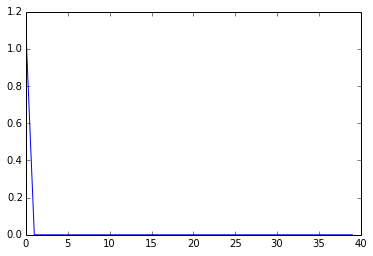

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(cost_rec[0:20000:500])
plt.show()

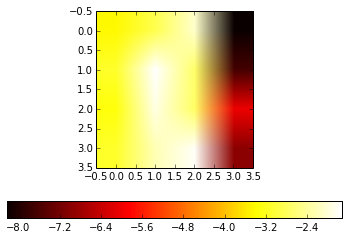

In [55]:
from matplotlib.pyplot import imshow
fig, ax = plt.subplots()
im = ax.imshow(Wmodel[0]['W'] ,cmap='hot')
plt.colorbar(im, orientation='horizontal')
plt.show()


DataXy_ = np.loadtxt(open("iris_prep.txt", "rb"), delimiter=",", skiprows=1)
print DataXy_.shape
rand_idx = np.random.permutation(149)
DataXy =  DataXy_[rand_idx,:]
print DataXy[0:4,:]
num_train = 100
num_test = 49
trainX = DataXy[0:num_train,:-1]
meanX = trainX.mean()
#print trainX
trainX = 0.1*(trainX-meanX) 
trainY = DataXy[0:num_train,-1]
trainY_onehot = np.zeros([num_train,3])
trainY_onehot[np.arange(num_train), trainY.astype(int)] = 1
trainY = trainY_onehot
testX = 0.1*(DataXy[num_train:,:-1]-meanX) 
testY = DataXy[num_train:,-1]
testY_onehot = np.zeros([num_test,3])
testY_onehot[np.arange(num_test), testY.astype(int)] = 1
testY = testY_onehot
#print trainX

model_hyper2 = {}
model_hyper2['num_classes'] = 3
model_hyper2['input_dim']=4
model_hyper2['num_hidden_layers']=3
model_hyper2['learnrate']=0.0001
layer_size = [None] * model_hyper2['num_hidden_layers']
layer_size[0] = 5
layer_size[1] = 4
layer_size[2] = 5
#layer_size[3] = 6
model_hyper2['layer_sizes'] = layer_size    

batch_size =1
num_train_batch = num_train/batch_size
num_rec = num_train
cost_rec = np.zeros(num_rec,dtype=np.float)
iris_nn = NeuralNet_Piano(model_hyper2)
#iris_nn.reset_cache()
for i in range(50000):
    th_batch = i%num_train_batch
    Xbatch = trainX[th_batch*batch_size:th_batch*batch_size+batch_size,:]
    #print Xbatch
    Ybatch = trainY[th_batch*batch_size:th_batch*batch_size+batch_size].astype(int)  
    #print Ybatch
    loss_iris,dz_iris = iris_nn.forward_train(Xbatch,Ybatch)
    if i < num_rec:
        cost_rec[i] = loss_iris
    print loss_iris
    iris_nn.backward_train(dz_iris)
    #iris_nn.check_grad_numgrad(Xbatch,Ybatch,0.0001,True)
    iris_nn.Apply_UpdateW()

import matplotlib.pyplot as plt
plt.plot(cost_rec[0:100])
plt.show()

In [56]:
print sigmoid_forward(1)*3

2.19317573589
